In [2]:
import pandas as pd
data=pd.read_csv ('data.csv')
print(data.columns)
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [3]:
data.replace(to_replace ="?", 
                 value ="0") 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,0,0,0,0
1,29,1,2,120,243,0,0,160,0,0.0,0,0,0,0
2,29,1,2,140,0,0,0,170,0,0.0,0,0,0,0
3,30,0,1,170,237,0,1,170,0,0.0,0,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,0,0,0,1
290,54,0,3,130,294,0,1,100,1,0.0,2,0,0,1
291,56,1,4,155,342,1,0,150,1,3.0,2,0,0,1
292,58,0,2,180,393,0,0,110,1,1.0,2,0,7,1


In [4]:
x=data.iloc[:,[0,1,2,4,5]].values
y=data.iloc[:,[13]].values
print(x)

[[28 1 2 '132' '0']
 [29 1 2 '243' '0']
 [29 1 2 '?' '0']
 ...
 [56 1 4 '342' '1']
 [58 0 2 '393' '0']
 [65 1 4 '275' '0']]


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,3]=le.fit_transform(x[:,3])
x

array([[28, 1, 2, 3, '0'],
       [29, 1, 2, 68, '0'],
       [29, 1, 2, 153, '0'],
       ...,
       [56, 1, 4, 134, '1'],
       [58, 0, 2, 142, '0'],
       [65, 1, 4, 95, '0']], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,4]=le.fit_transform(x[:,4])
x

array([[28, 1, 2, 3, 0],
       [29, 1, 2, 68, 0],
       [29, 1, 2, 153, 0],
       ...,
       [56, 1, 4, 134, 1],
       [58, 0, 2, 142, 0],
       [65, 1, 4, 95, 0]], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.95,random_state=1)
x

array([[28, 1, 2, 3, 0],
       [29, 1, 2, 68, 0],
       [29, 1, 2, 153, 0],
       ...,
       [56, 1, 4, 134, 1],
       [58, 0, 2, 142, 0],
       [65, 1, 4, 95, 0]], dtype=object)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, )
model.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
y_pred=model.predict(x_test)
print(y_test)
print(y_pred) 

[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]
[0 0 1 1 0 0 0 1 0 0 0 0 1 0 1]


In [29]:
t1=sc.transform([[74,1,3,186,0]])
pt1=model.predict(t1)
(pt1)

array([1])

In [32]:
acc=metrics.accuracy_score(y_test,y_pred,normalize=True)
pr=metrics.precision_score(y_test,y_pred,average='micro')
print(acc,pr)

0.7333333333333333 0.7333333333333333


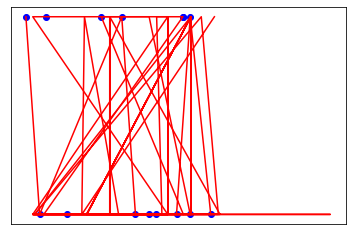

In [33]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:,0], y_test[:,0],color='blue')
plt.plot(x_test,y_pred,color='red')
plt.xticks(())
plt.yticks(())
plt.show()